In [7]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [8]:
df = pd.read_csv(r"../../data/processed/emotet_static.csv")

df.drop("Is Encrypted Traffic", axis=1, inplace=True)

## EDA

In [9]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(79667, 33)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0
Max Payload Size,int64,0,0.0
Mean Entropy,float64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,1817


### Categorical

In [10]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,4,TCP,76.17%
1,Flags,14,SYN,51.51%
2,Label,2,Benign,53.88%
3,Direction,2,outbound,75.63%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,60684,76.172066
1,HTTP,14216,17.844277
2,DATA-TEXT-LINES,4743,5.953532
3,XML,24,0.030125


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,SYN,41036,51.509408
1,"PSH,ACK",18926,23.756386
2,"FIN,SYN,ACK",9294,11.666060
3,"SYN,RST,ACK",6277,7.879047
4,"FIN,SYN,RST,ACK",2958,3.712955
5,"FIN,SYN,PSH,ACK",556,0.697905
6,"SYN,ACK",289,0.362760
7,"FIN,SYN,RST,PSH,ACK",119,0.149372
8,"SYN,RST",64,0.080334
9,"SYN,PSH,ACK",53,0.066527


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,42922,53.876762
1,Emotet,36745,46.123238


---

### Column: Direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,60249,75.626043
1,inbound,19418,24.373957


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,Min Entropy,Max Entropy,...,Is Source Common,Common Port Usage,Flags Count,Syn Count,Ack Count,Fin Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Mean,9.321700e+04,2.972222,2.634756e+02,134.134595,-2.533459e+04,131.267288,138.773871,2.485470,-5.454358e+11,3.405773,...,0.009063,0.013795,1.774725,0.761696,0.48409,0.162991,0.178443,0.756850,0.256857,0.252413
Median,8.999831e+00,3.000000,1.340000e+02,44.666667,1.885618e+00,42.000000,46.000000,3.064484,2.695258e+00,3.436725,...,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,1.000000e-06,3.000000,1.340000e+02,44.666667,1.885618e+00,42.000000,46.000000,3.126317,1.082409e+12,3.439248,...,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,3.966787e+05,3.516800,3.862535e+03,185.334298,7.302974e+04,185.436255,187.832729,1.456525,8.211049e+12,0.074286,...,0.094767,0.116640,0.923192,0.426049,0.49975,0.369360,0.382887,0.428987,0.436902,0.434400
Variance,1.573540e+11,12.367880,1.491918e+07,34348.801938,5.333343e+09,34386.604755,35281.134176,2.121466,6.742132e+25,0.005518,...,0.008981,0.013605,0.852283,0.181518,0.24975,0.136427,0.146603,0.184030,0.190884,0.188703
Range,3.037289e+06,397.000000,4.833180e+05,1344.000000,3.672119e+05,1344.000000,1420.000000,36.649846,2.991507e+14,1.976775,...,1.000000,1.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,1.000000e-06,1.000000,3.400000e+01,34.000000,-3.665050e+05,34.000000,34.000000,-8.328277,-2.959035e+14,2.120952,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3.037289e+06,398.000000,4.833520e+05,1378.000000,7.068421e+02,1378.000000,1454.000000,28.321570,3.247226e+12,4.097728,...,1.000000,1.000000,5.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,Min Entropy,Max Entropy,...,Is Source Common,Common Port Usage,Flags Count,Syn Count,Ack Count,Fin Count,Is HTTP,Is Internal IP,Short Duration,Single Packet
Duration,1.000000,0.215764,0.012092,-0.071131,0.080714,-0.072625,-0.070685,0.174737,0.002977,-0.049954,...,-0.022462,-0.027775,-0.010974,0.072955,-0.045010,0.001580,-0.046753,0.074692,-0.138155,-0.136548
Packets,0.215764,1.000000,0.870550,-0.207437,0.194602,-0.278244,-0.181380,-0.125154,-0.039405,-0.096391,...,0.003731,0.030617,0.136267,0.310270,-0.043101,0.151374,-0.257689,0.089683,-0.321172,-0.325864
Bytes,0.012092,0.870550,1.000000,0.109226,-0.021603,0.031569,0.122997,0.018460,-0.003432,0.025834,...,0.020987,0.018748,0.043951,-0.024480,0.033174,0.014038,0.013974,-0.024892,0.020084,0.020100
Mean Payload Size,-0.071131,-0.207437,0.109226,1.000000,-0.693793,0.993061,0.985391,0.320392,0.010749,0.173443,...,0.085478,0.057838,0.114207,-0.876922,0.498105,-0.223209,0.591421,-0.248230,0.816086,0.824412
Std Payload Size,0.080714,0.194602,-0.021603,-0.693793,1.000000,-0.698801,-0.675952,-0.223321,-0.023161,-0.081668,...,0.033263,0.041149,-0.083879,0.618723,-0.356801,0.153142,-0.471060,0.166796,-0.589726,-0.596681
Min Payload Size,-0.072625,-0.278244,0.031569,0.993061,-0.698801,1.000000,0.967362,0.325952,0.035895,0.179914,...,0.068387,0.034342,0.103817,-0.884638,0.496233,-0.230656,0.598197,-0.245739,0.822838,0.832944
Max Payload Size,-0.070685,-0.181380,0.122997,0.985391,-0.675952,0.967362,1.000000,0.295788,-0.067684,0.155254,...,0.115739,0.121217,0.152335,-0.851890,0.509897,-0.192400,0.572148,-0.255641,0.796756,0.799095
Mean Entropy,0.174737,-0.125154,0.018460,0.320392,-0.223321,0.325952,0.295788,1.000000,0.092676,0.705896,...,0.026026,-0.028887,-0.169407,-0.364280,0.021769,-0.199182,0.310564,-0.038166,0.364338,0.370216
Min Entropy,0.002977,-0.039405,-0.003432,0.010749,-0.023161,0.035895,-0.067684,0.092676,1.000000,0.076332,...,0.006353,0.007856,-0.189543,-0.037155,-0.117354,-0.126008,0.030958,0.073355,0.039053,0.038599
Max Entropy,-0.049954,-0.096391,0.025834,0.173443,-0.081668,0.179914,0.155254,0.705896,0.076332,1.000000,...,-0.051417,-0.076353,-0.111222,-0.220695,0.000285,-0.116149,0.316405,0.265440,0.220485,0.224204


### Correlation Matrix Heatmap:

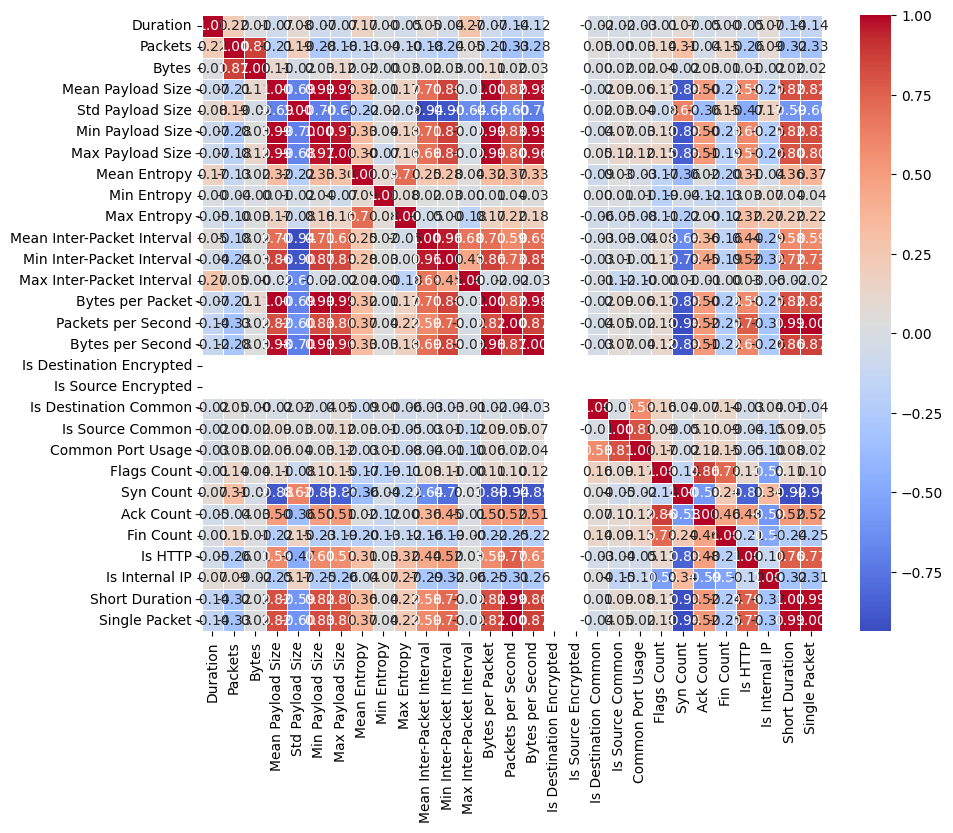

In [11]:
info.numerical_summary()

## Modeling

#### Encoding

In [12]:
encoder = LabelEncoder()

columns_to_encode = ["Protocol", "Flags", "Label", "Direction"]

for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

columns_to_impute = [
    "Mean Payload Size",
    "Std Payload Size",
    "Min Payload Size",
    "Max Payload Size",
    "Mean Entropy",
    "Min Entropy",
    "Max Entropy",
    "Mean Inter-Packet Interval",
    "Min Inter-Packet Interval",
    "Max Inter-Packet Interval",
]

df_imputation = df.drop(columns_to_impute, axis=1).copy()

imputer = IterativeImputer(max_iter=10, random_state=42)

for x in columns_to_impute:
    df_imputation[x] = df[x]
    for label in df["Label"].unique():
        label_mask = df_imputation["Label"] == label
        label_df = df_imputation[label_mask].copy()

        label_df[x] = label_df[x].replace(0, np.nan)


        imputed_data = imputer.fit_transform(label_df)

        df_imputation.loc[label_mask, x] = imputed_data[
            :, df_imputation.columns.get_loc(x)
        ]

df = df_imputation.copy()

#### Type Casting

In [13]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["Flags Count"] = df["Flags Count"].astype("float64")

### Data Splitting

In [14]:
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

scaler = StandardScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

df["Label"] = label_column

## Models

### Model Creation and Parameters

In [15]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_estimators = 7
dt_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

### Splitting

In [16]:
df_reset = df.reset_index(drop=True)
X = df_reset.drop("Label", axis=1)
y = df["Label"]

### KNN

In [17]:
dt_normal = prisma.MachineLearning()
dt_normal_metrics, avg_dt_normal_metrics, dt_normal_model = (
    dt_normal.evaluate_model(X, y, test_size, iterations, dt_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:05<00:00,  5.72it/s]


### Random Forest

In [18]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model: 100%|██████████| 30/30 [00:55<00:00,  1.86s/it]


### Logistic Regression

In [19]:
logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model: 100%|██████████| 30/30 [00:12<00:00,  2.31it/s]


### Model Evaluation

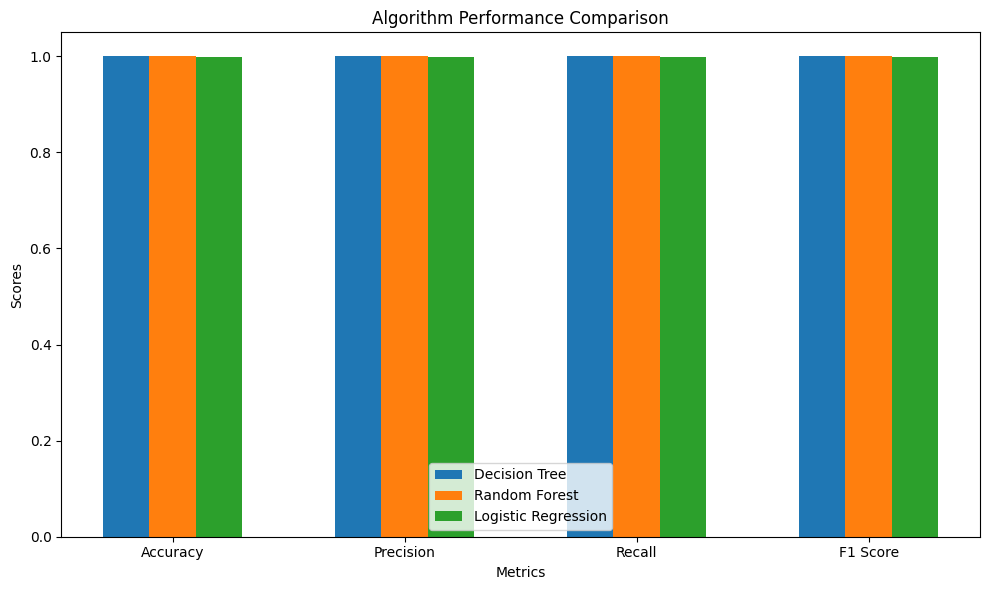

In [20]:
normal_metrics = {"Decision Tree":avg_dt_normal_metrics, "Random Forest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'Decision Tree': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0},
 'Random Forest': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0},
 'Logistic Regression': {'Accuracy': 0.998,
  'Precision': 0.998,
  'Recall': 0.998,
  'F1 Score': 0.998}}

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

X_lstm = np.expand_dims(X, axis=1)

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y, test_size=0.2, random_state=42, stratify=y
)

model = Sequential(
    [
        LSTM(
            128,
            input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]),
            return_sequences=True,
        ),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(
            y.shape[1] if len(y.shape) > 1 else 1,
            activation="sigmoid",
        ),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=200,
    batch_size=64,
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

2025-01-17 22:50:57.800473: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 22:50:57.803582: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 22:50:57.811396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737143457.825206   90608 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737143457.829894   90608 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 22:50:57.846448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/200


2025-01-17 22:51:01.322200: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


996/996 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9602 - loss: 0.1372 - val_accuracy: 0.9976 - val_loss: 0.0031
Epoch 2/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9974 - loss: 0.0038 - val_accuracy: 0.9991 - val_loss: 0.0021
Epoch 3/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9990 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 5.4685e-04
Epoch 5/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9997 - loss: 9.2440e-04 - val_accuracy: 1.0000 - val_loss: 2.6366e-04
Epoch 6/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9998 - loss: 8.8073e-04 - val_accuracy: 0.9999 - val_loss: 3.3847e-04
Epoch 7/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9999 - loss: 5.6082e-04 - val_accuracy: 1.0000 - val_loss: 1.2233e-05
Epoch 8/200
996/996 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9997 - loss: 

498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8585
           1       1.00      1.00      1.00      7349

    accuracy                           1.00     15934
   macro avg       1.00      1.00      1.00     15934
weighted avg       1.00      1.00      1.00     15934



<Figure size 800x600 with 0 Axes>

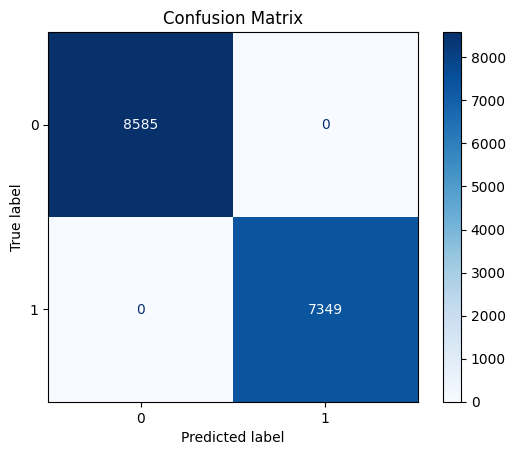

In [23]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
y_pred_lstm = model.predict(X_test_lstm)

# Convert predictions to binary labels (for binary classification)
y_pred_binary = (y_pred_lstm > 0.5).astype(int).flatten()

print("\nClassification Report:")
report = classification_report(y_test_lstm, y_pred_binary)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_lstm, y_pred_binary)

# Display confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

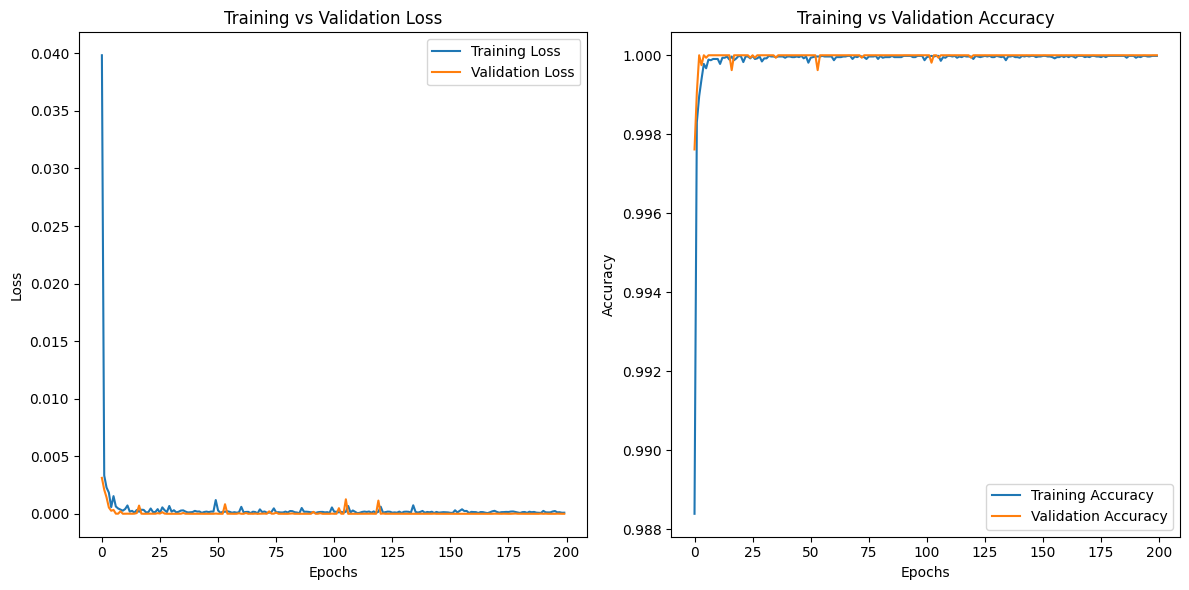

In [24]:
epochs = len(history.history["loss"])
epoch_ticks = np.arange(0, epochs, 25)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_ticks, history.history["loss"][::25], label="Training Loss")
plt.plot(epoch_ticks, history.history["val_loss"][::25], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epoch_ticks)
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epoch_ticks, history.history["accuracy"][::25], label="Training Accuracy")
plt.plot(epoch_ticks,history.history["val_accuracy"][::25], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epoch_ticks)
plt.legend()

plt.tight_layout()
plt.show()